In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
# read data
data = pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S5_SuperstoreSales_Data_Hackathon.csv", index_col='Order Date',parse_dates=True)
data

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,3/22/2015,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,12-10-2016,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,09-09-2015,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,85.9800,1,0.00,22.3548


In [5]:
df= data[['Sales']]
print(df)

                Sales
Order Date           
2016-11-08   261.9600
2016-11-08   731.9400
2015-10-11   957.5775
2014-06-09    48.8600
2014-06-09  1706.1840
...               ...
2015-03-19   383.4656
2016-12-05    13.4000
2015-09-06    85.9800
2014-01-21    25.2480
2017-02-26    91.9600

[2121 rows x 1 columns]


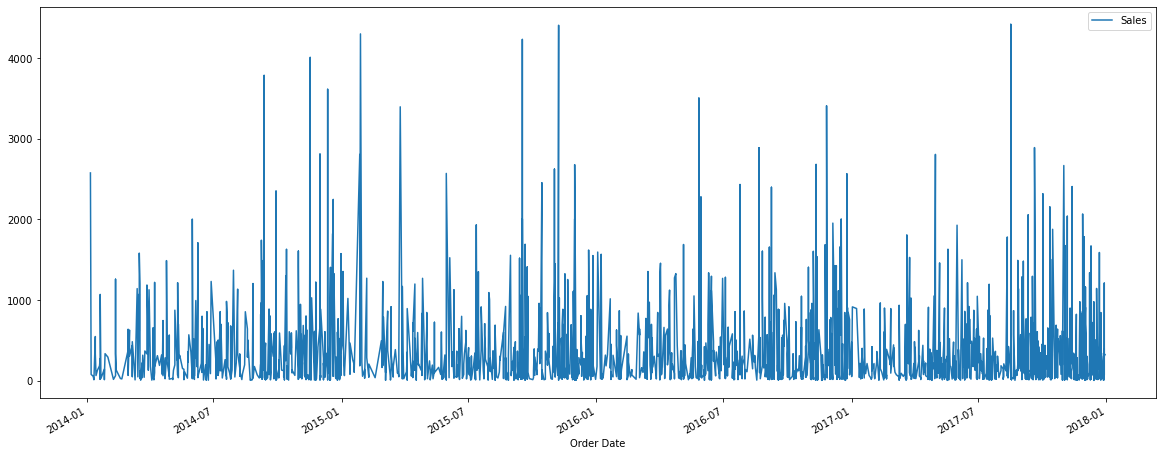

In [6]:
df.plot(figsize=(20,8))
plt.show()

In [7]:
df1 = data.resample('7D').mean()
print(df1)

                 Row ID   Postal Code       Sales  Quantity  Discount  \
Order Date                                                              
2014-01-06  4180.000000  40453.500000  678.107000  3.750000  0.150000   
2014-01-13  4166.000000  49420.200000  250.094600  4.800000  0.310000   
2014-01-20  4883.777778  51856.666667  183.995333  2.888889  0.022222   
2014-01-27  3581.000000  92364.000000  311.833000  2.500000  0.175000   
2014-02-03  9267.000000  89031.000000   14.560000  2.000000  0.000000   
...                 ...           ...         ...       ...       ...   
2017-11-27  5603.468750  55484.812500  500.255375  4.750000  0.190625   
2017-12-04  4678.571429  43041.571429  314.085857  4.107143  0.121429   
2017-12-11  5272.947368  56105.631579  244.201000  3.000000  0.255263   
2017-12-18  4798.227273  46670.590909  330.638318  3.454545  0.125000   
2017-12-25  4470.444444  55679.111111  224.309156  3.388889  0.178889   

                Profit  
Order Date              


In [8]:
df1=df1.dropna()

In [9]:
df_sales = df1[['Sales']]
print(df_sales)

                 Sales
Order Date            
2014-01-06  678.107000
2014-01-13  250.094600
2014-01-20  183.995333
2014-01-27  311.833000
2014-02-03   14.560000
...                ...
2017-11-27  500.255375
2017-12-04  314.085857
2017-12-11  244.201000
2017-12-18  330.638318
2017-12-25  224.309156

[208 rows x 1 columns]


### Split data into 70:30

In [10]:
ss = int(np.round(len(df1) * 0.7,0))
print('actual length = {}, sample size = {}'.format(len(df_sales), ss))
train = df1[:ss]
test = df1[ss:]
print('train = {}, test = {}'.format(len(train), len(test)))

actual length = 208, sample size = 146
train = 146, test = 62


### Decomposition

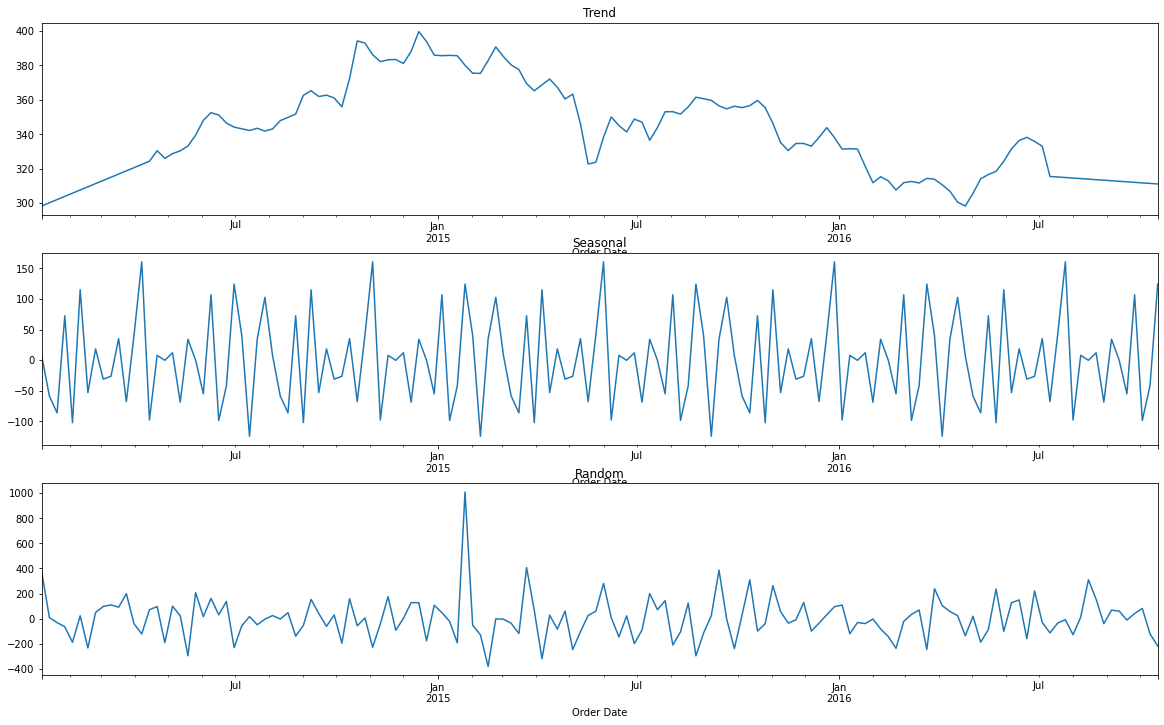

In [11]:
# seasonal_decompose

fig,ax = plt.subplots(3,1,figsize=(20,12))

result = seasonal_decompose(train['Sales'], period=30, extrapolate_trend='freq')

result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")
plt.show()

## TASK - 2

### Check for stationarity

In [12]:
# dickey-fuller test for stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [13]:
new_train=train[['Sales']]

In [14]:
checkStationarity(new_train)

'p-value=3.5125424555158124e-19. Data is stationary'

### Plot ACF and PACF

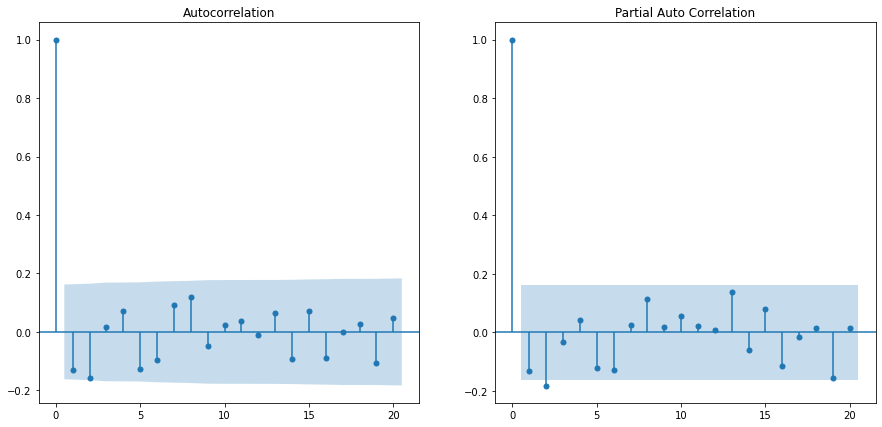

In [15]:
ROWS=1;COLS=2
fig,ax=plt.subplots(ROWS,COLS,figsize=(15,7))
plot_acf(train['Sales'],lags=20,ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(train['Sales'], lags=20,ax=ax[1]);
plt.title("Partial Auto Correlation")
plt.show()

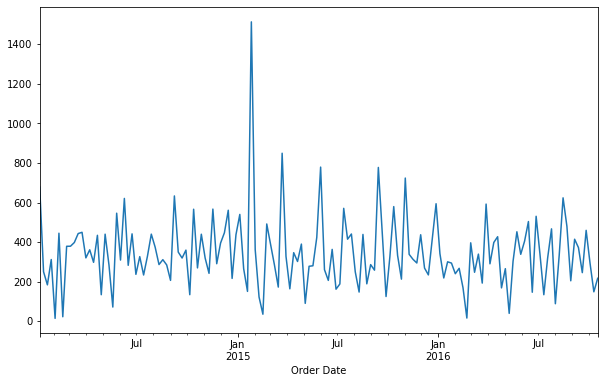

In [16]:
train['Sales'].plot(figsize=(10,6))
plt.show()

In [17]:
p=[1,2,3,4]
q=[1,2,3,4]
d=0
for i in p:
    for j in q:
        m1=ARIMA(train['Sales'],order=(i,d,j)).fit()
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -965.230
Date:                Fri, 29 Apr 2022   AIC                           1938.461
Time:                        13:46:41   BIC                           1950.395
Sample:                    01-06-2014   HQIC                          1943.310
                         - 10-17-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        344.2574     12.134     28.371      0.000     320.475     368.040
ar.L1          0.4520      0.306      1.476      0.140      -0.148       1.052
ma.L1         -0.6440      0.262     -2.455      0.0

## By comaparing the above models we found that, the best model is with values (1,0,1) with least AIC, BIC AND L-JUNG BOX VALUE

## TASK - 3

### Build the ARMA model

In [18]:
p=1; d=0; q=1
m1 = ARIMA(df['Sales'],order=(p,d,q)).fit()
print(m1.summary())       

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 2121
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -16196.346
Date:                Fri, 29 Apr 2022   AIC                          32400.692
Time:                        13:46:59   BIC                          32423.330
Sample:                             0   HQIC                         32408.979
                               - 2121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.8356     21.227     16.481      0.000     308.231     391.440
ar.L1          0.6822      0.136      5.000      0.000       0.415       0.950
ma.L1         -0.6213      0.148     -4.197      0.0

### Predict sales using the model

In [19]:
# predictions
predictions_1 = m1.predict(0, len(test)-1)
predictions_1

Order Date
2016-11-08    349.835626
2016-11-08    344.099462
2015-10-11    370.214917
2014-06-09    399.932808
2014-06-09    362.517859
                 ...    
2016-12-10    429.251076
2015-11-28    397.448958
2015-07-30    358.821236
2015-11-02    334.405736
2016-11-20    382.267700
Name: predicted_mean, Length: 62, dtype: float64

### Collate actual, predicted, and error values together

In [20]:
# actual vs predicted values

actual = []
pred = []

for i in range(len(predictions_1)):
    actual.append(test['Sales'][i])
    pred.append(predictions_1[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

        actual   predicted         err
0   215.243556  349.835626 -134.592070
1   389.836283  344.099462   45.736822
2   472.766083  370.214917  102.551166
3   213.844308  399.932808 -186.088500
4   494.963316  362.517859  132.445457
..         ...         ...         ...
57  500.255375  429.251076   71.004299
58  314.085857  397.448958  -83.363101
59  244.201000  358.821236 -114.620236
60  330.638318  334.405736   -3.767418
61  224.309156  382.267700 -157.958545

[62 rows x 3 columns]


In [21]:
df_res=df_res.dropna()

### Plotting errors

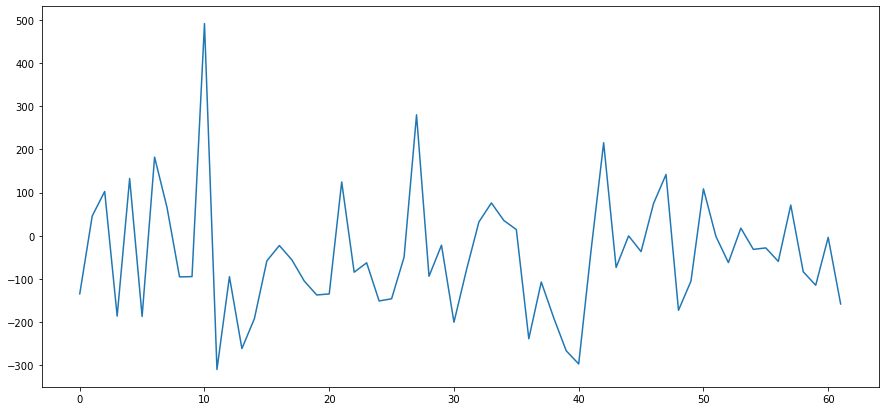

In [22]:
# errors
fig,ax = plt.subplots(figsize=(15, 7))
df_res.err.plot()
plt.show()

### Box-Jenkins test to check model's goodness

In [23]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
    


Fail-to-Reject H0. Good model


### Calculate error terms

In [24]:
# MSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))  

ARIMA Model. Order=(1,0,1)
	MSE = 21784.318237481024
	RMSE = 147.59511589981906


### Plot actual vs. predicted values

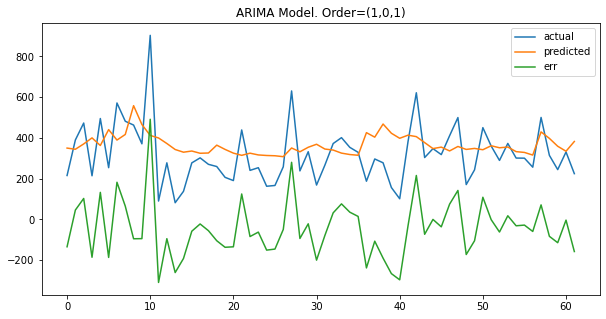

In [25]:
df_res.actual.plot(figsize=(10, 5),legend=True)
df_res.predicted.plot(legend=True)
df_res.err.plot(legend=True)
plt.title(msg);

## TASK - 4 

### Build the ARIMA Model

In [26]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=1; d=0; q=1
m2 = ARIMA(df['Sales'],order=(p,d,q)).fit()
print(m2.summary())  

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 2121
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -16196.346
Date:                Fri, 29 Apr 2022   AIC                          32400.692
Time:                        13:47:25   BIC                          32423.330
Sample:                             0   HQIC                         32408.979
                               - 2121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        349.8356     21.227     16.481      0.000     308.231     391.440
ar.L1          0.6822      0.136      5.000      0.000       0.415       0.950
ma.L1         -0.6213      0.148     -4.197      0.0

### Use the model to predict the value

In [27]:
# predictions
predictions_2 = m2.predict(0, len(test)-1)
predictions_2

Order Date
2016-11-08    349.835626
2016-11-08    344.099462
2015-10-11    370.214917
2014-06-09    399.932808
2014-06-09    362.517859
                 ...    
2016-12-10    429.251076
2015-11-28    397.448958
2015-07-30    358.821236
2015-11-02    334.405736
2016-11-20    382.267700
Name: predicted_mean, Length: 62, dtype: float64

### Collate actual, predicted, and errors together

In [28]:
actual = []
pred = []

for i in range(len(predictions_2)):
    actual.append(df['Sales'][i])
    pred.append(predictions_2[i])

df_res1 = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res1['err'] = df_res1.actual - df_res1.predicted
print(df_res1)

       actual   predicted          err
0    261.9600  349.835626   -87.875626
1    731.9400  344.099462   387.840538
2    957.5775  370.214917   587.362583
3     48.8600  399.932808  -351.072808
4   1706.1840  362.517859  1343.666141
..        ...         ...          ...
57   321.5680  429.251076  -107.683076
58    12.1320  397.448958  -385.316958
59     5.2800  358.821236  -353.541236
60  1038.8400  334.405736   704.434264
61    86.9700  382.267700  -295.297700

[62 rows x 3 columns]


### Calculate error terms

In [29]:
new_df=df_res1.dropna()

In [30]:
# MSE
mse = mean_squared_error(new_df.actual, new_df.predicted)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse,np.sqrt(mse)))


	MSE = 345782.85529490944
	RMSE = 588.033039288533


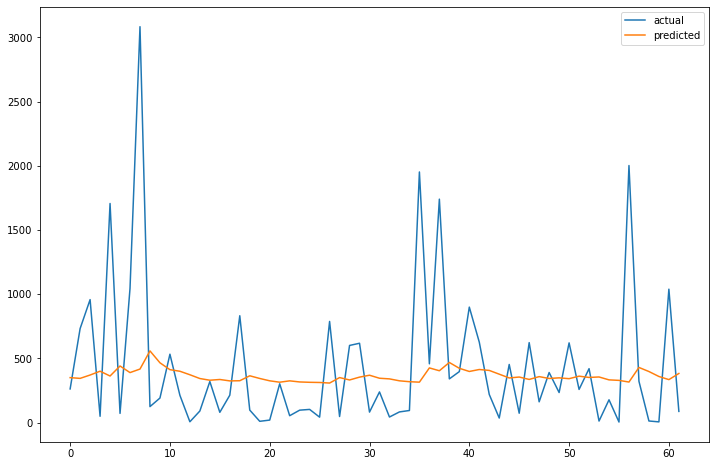

In [31]:
# plot
new_df[['actual','predicted']].plot(figsize=(12,8))
plt.show()

### Forecast the future values using the model

In [44]:
fcast = m2.predict(start=len(df_sales), end=len(df_sales)+11, typ='levels').rename('Forecast')
print(fcast) 

Order Date
2014-11-24    390.732573
2017-06-17    363.161230
2015-12-21    346.247685
2015-07-06    424.966383
2015-07-06    376.028034
2015-04-27    354.276004
2014-07-11    408.558528
2014-07-11    417.120562
2016-04-22    377.871126
2016-03-20    351.200968
2016-09-06    371.864938
2017-10-12    386.238818
Name: Forecast, dtype: float64


### Visualize the forecast

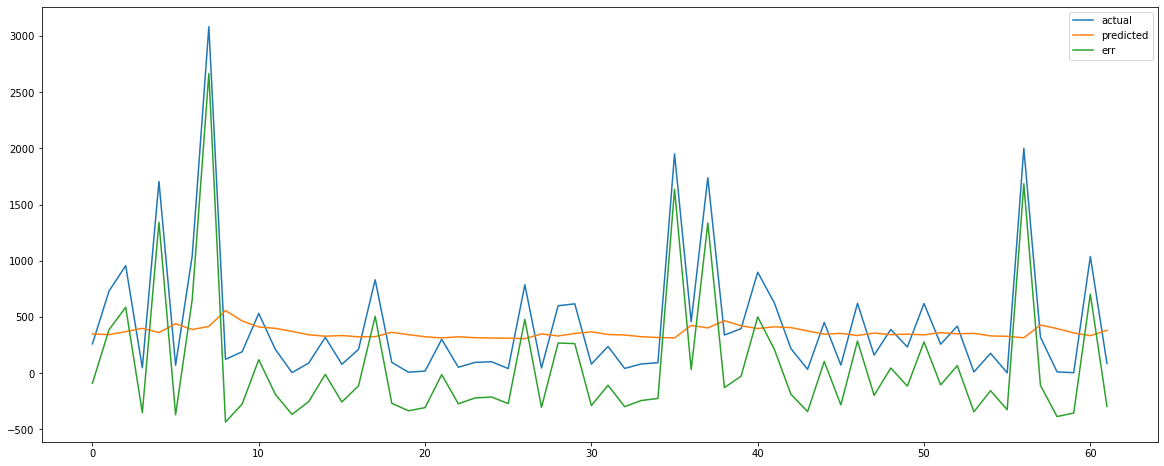

In [45]:
new_df.plot(figsize=(20,8),legend=True)
plt.show() 

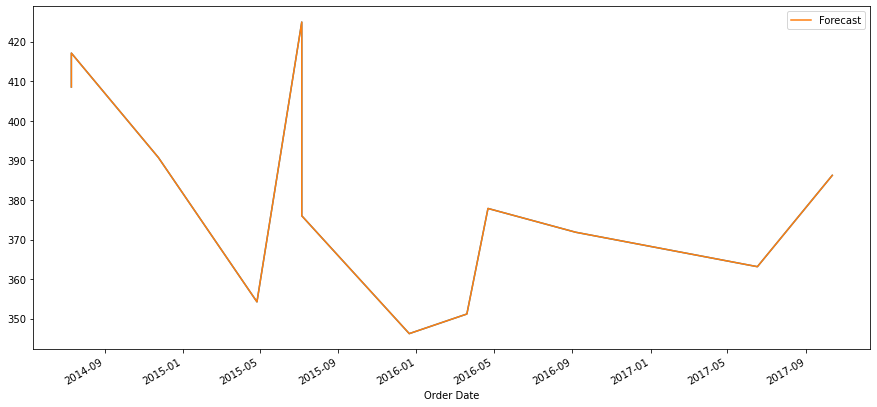

In [54]:
fcast.plot(figsize=(15,7))                          
fcast.plot(legend=True)           
plt.show()                                   

## TASK - 5 

### SARIMA

### Split exogenous data into train and test parts

In [41]:
exog_train = train[['Sales','Quantity','Discount','Profit']]
exog_test = test[['Sales','Quantity','Discount','Profit']]

In [42]:
print(exog_train.head())

                 Sales  Quantity  Discount      Profit
Order Date                                            
2014-01-06  678.107000  3.750000  0.150000  179.268750
2014-01-13  250.094600  4.800000  0.310000  -50.800880
2014-01-20  183.995333  2.888889  0.022222   39.514033
2014-01-27  311.833000  2.500000  0.175000   -6.615200
2014-02-03   14.560000  2.000000  0.000000    5.532800


In [43]:
print(exog_test.head())

                 Sales  Quantity  Discount     Profit
Order Date                                           
2016-10-24  215.243556  4.444444  0.077778  41.848911
2016-10-31  389.836283  4.166667  0.192500 -16.862163
2016-11-07  472.766083  3.833333  0.137500  36.558633
2016-11-14  213.844308  3.153846  0.269231 -18.043969
2016-11-21  494.963316  4.263158  0.152632  50.444468


In [45]:
print('exog_train = {}, train = {}'.format( len(exog_train), len(train)))

exog_train = 146, train = 146


In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train.Sales, order=(1,0,1), seasonal_order=(1,0,0,52), exog = exog_train.values).fit()
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  146
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 52)   Log Likelihood                1526.104
Date:                             Thu, 28 Apr 2022   AIC                          -3036.208
Time:                                     20:56:32   BIC                          -3012.340
Sample:                                 01-06-2014   HQIC                         -3026.510
                                      - 10-17-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.47e-18    6.8e+17      0.000       1.000       1.000
x2         -1.066e-14   1.4

In [47]:
forecast = model.forecast(len(test), exog=exog_test.values)
forecast

2016-10-24    215.243556
2016-10-31    389.836283
2016-11-07    472.766083
2016-11-14    213.844308
2016-11-21    494.963316
                 ...    
2017-11-27    500.255375
2017-12-04    314.085857
2017-12-11    244.201000
2017-12-18    330.638318
2017-12-25    224.309156
Freq: 7D, Name: predicted_mean, Length: 62, dtype: float64

### Calculate error terms

In [62]:
mse = mean_squared_error(test.Sales, forecast)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse,np.sqrt(mse)))


	MSE = 4.613869304755874e-26
	RMSE = 2.1479919238106725e-13


### actual and forecasted values also calculate error term

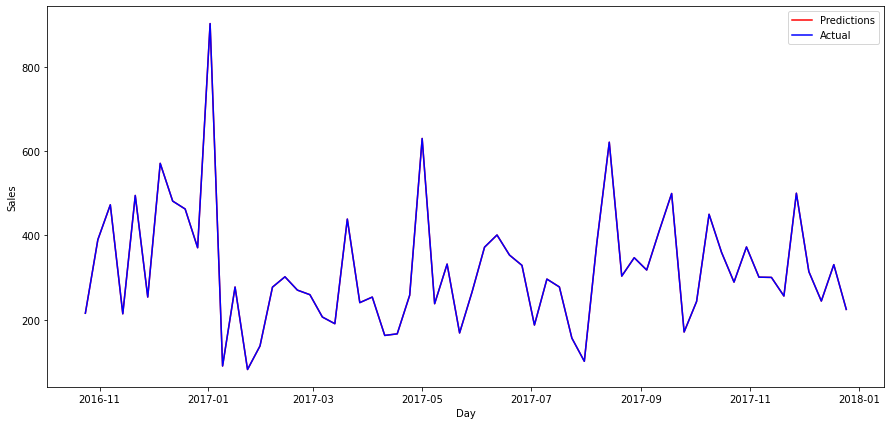

In [59]:
plt.figure(figsize=(15,7))
plt.plot(forecast, 'r', label = 'Predictions')
plt.plot(test.Sales, 'b', label='Actual')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()

### Plotting Forecast

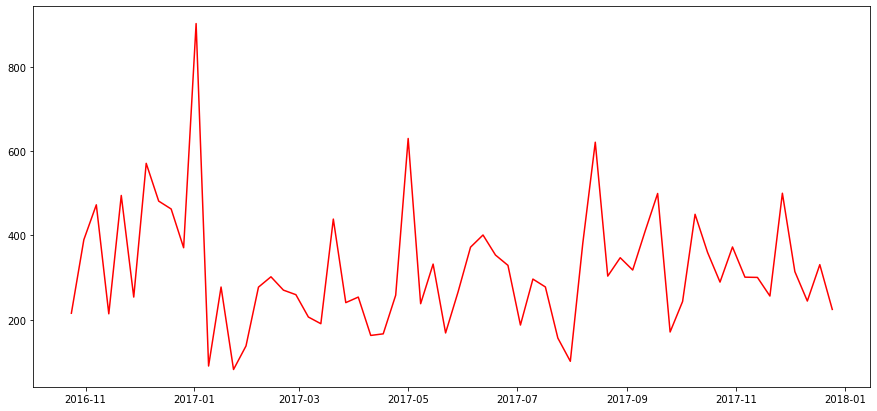

In [51]:
plt.figure(figsize=(15,7))
plt.plot(forecast, 'r', label = 'Predictions')
plt.show()

### Plotting Sales

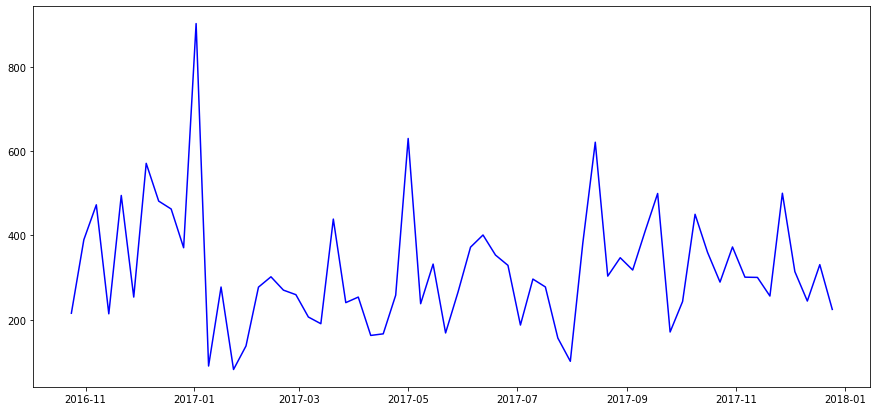

In [53]:
plt.figure(figsize=(15,7))
plt.plot(test.Sales, 'b', label='Actual')
plt.show()

## TASK - 6 

### MSE / RMSE / AIC / BIC score for ARMA model

MSE = 21784.318237481024

RMSE = 147.59511589981906

AIC  = 32400.692

BIC  =  32423.330

### MSE /RMSE /AIC /BIC score for ARIMA model

MSE = 345782.85529490944

RMSE = 588.033039288533

AIC  =  32400.692

BIC  =  32423.330

### MSE / RMSE / AIC / BIC score for SARIMA model

MSE = 4.613869304755874e-26

RMSE = 2.1479919238106725e-13

AIC  = -3036.208

BIC  = -3012.340

### Conclusion:- The best model with low MSE / RMSE / AIC / BIC Score is for SARIMA MODEL